In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Train Test Data Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import glob

csv_files = glob.glob("datasets/*.csv")

In [3]:
csv_files

['datasets\\AMPdsR1_1hr_Wh.csv',
 'datasets\\AMPdsR1_1min_A.csv',
 'datasets\\AMPdsR1_1min_A_test.csv',
 'datasets\\AMPdsR1_1min_A_test100.csv',
 'datasets\\AMPdsR1_1min_A_train.csv',
 'datasets\\REDD_modified2_train.csv',
 'datasets\\REDD_modified2_train_kW.csv',
 'datasets\\REDD_modified2_val.csv',
 'datasets\\REDD_modified2_val_kW.csv',
 'datasets\\REDD_modified_test.csv',
 'datasets\\REDD_modified_test2.csv',
 'datasets\\REDD_modified_test200.csv',
 'datasets\\REDD_modified_train.csv',
 'datasets\\REDD_modified_val.csv',
 'datasets\\REDD_modified_val200.csv',
 'datasets\\TEALD_2016-02-07.csv',
 'datasets\\TEALD_2016-02-08.csv',
 'datasets\\TEALD_2016-02-09.csv',
 'datasets\\TEALD_2016-02-10.csv',
 'datasets\\TEALD_2016-02-11.csv',
 'datasets\\TEALD_2016-02-12.csv',
 'datasets\\TEALD_2016-02-13.csv',
 'datasets\\TEALD_2016-02-14.csv',
 'datasets\\TEALD_2016-02-15.csv']

In [4]:
train_df = pd.read_csv('datasets/REDD_modified2_train_kW.csv')
val_df = pd.read_csv('datasets/REDD_modified2_val_kW.csv')

In [5]:
train_df.describe()

,TimeStamp,MAIN,FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON
count,6.912000e+05,691200.000000,691200.000000,691200.000000,691200.000000,691200.000000,691200.000000
mean,1.304222e+09,0.844902,0.054162,0.105633,0.036382,0.009838,0.638887
std,5.985972e+05,1.273590,0.082883,0.009117,0.041064,0.052455,1.264739
min,1.303186e+09,0.113000,0.000000,0.010000,0.000000,0.000000,0.046000
25%,1.303704e+09,0.210000,0.006000,0.100000,0.002000,0.004000,0.092000
50%,1.304222e+09,0.284000,0.007000,0.105000,0.002000,0.004000,0.092000
75%,1.304741e+09,0.435000,0.179000,0.110000,0.081000,0.004000,0.092000
max,1.305259e+09,4.820171,0.325171,0.133504,0.184168,0.500262,4.461171


In [6]:
val_df.describe()

,TimeStamp,MAIN,FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON
count,2.016000e+05,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000,201600.000000
mean,1.305562e+09,0.784585,0.061510,0.104236,0.034246,0.031938,0.552655
std,1.745912e+05,1.205206,0.095369,0.008592,0.044556,0.113156,1.188687
min,1.305259e+09,0.112000,0.001000,0.050000,0.000000,0.001000,0.046000
25%,1.305410e+09,0.213000,0.007000,0.100000,0.001000,0.004000,0.092000
50%,1.305562e+09,0.253000,0.007000,0.105000,0.040000,0.004000,0.092000
75%,1.305713e+09,0.442000,0.184000,0.110000,0.041000,0.005000,0.092000
max,1.305864e+09,4.855171,0.650343,0.133504,0.184168,0.500262,4.461171


# Running of Algorithm

## Training

In [4]:
!python train_SSHMM.py


----------------------------------------------------------------------------------------------------------------
Create & Save a SSHMM for Load Disaggregation Testing/Evaluation -- Copyright (C) 2013-2015, by Stephen Makonin.
----------------------------------------------------------------------------------------------------------------

Start Time =  2020-07-20 03:17:20.363011 (local time)


USAGE: train_SSHMM.py [modeldb] [dataset] [precision] [max obs] [denoised] [max states] [folds] [ids]

       [modeldb]    - file name of model (omit file ext).
       [dataset]    - file name of dataset to use (omit file ext).
       [precision]  - number; e.g. 10 would convert A to dA.
       [max obs]    - The max observed value, e.g. 200.1 A.
       [denoised]   - denoised aggregate reads, else noisy.
       [max states] - max number of states a each load can have.
       [folds]      - number usually set to 10, 1 means data same for train/test.
       [ids]        - e.g. CDE,FGE(,...) -- cas

In [1]:
%run -i train_SSHMM.py REDD_modified2_model_ALL REDD_modified2_train_kW 1000 5000 denoised 8 1 FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON


----------------------------------------------------------------------------------------------------------------
Create & Save a SSHMM for Load Disaggregation Testing/Evaluation -- Copyright (C) 2013-2015, by Stephen Makonin.
----------------------------------------------------------------------------------------------------------------

Start Time =  2020-07-22 08:53:02.327248 (local time)


Parameters: ['REDD_modified2_model_ALL', 'REDD_modified2_train_kW', '1000', '5000', 'denoised', '8', '1', 'FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON']

9
Loading REDD Low Res dataset at ./datasets/REDD_modified2_train_kW.csv...
1
         TimeStamp   MAIN  FRIDGE  SOCKETS  LIGHT  MICROWAVE  AIRCON
0       1303185600  3.638   0.007    0.095  0.082      0.004   3.450
1       1303185603  3.648   0.007    0.105  0.082      0.004   3.450
2       1303185606  3.662   0.007    0.120  0.081      0.004   3.450
3       1303185609  3.662   0.007    0.120  0.081      0.004   3.450
4       1303185612  3.731   0.00

1
         TimeStamp   MAIN  FRIDGE  SOCKETS  LIGHT  MICROWAVE  AIRCON
0       1303185600  3.638   0.007    0.095  0.082      0.004   3.450
1       1303185603  3.648   0.007    0.105  0.082      0.004   3.450
2       1303185606  3.662   0.007    0.120  0.081      0.004   3.450
3       1303185609  3.662   0.007    0.120  0.081      0.004   3.450
4       1303185612  3.731   0.007    0.120  0.081      0.004   3.519
...            ...    ...     ...      ...    ...        ...     ...
691195  1305259185  0.436   0.192    0.105  0.043      0.004   0.092
691196  1305259188  0.439   0.195    0.105  0.043      0.004   0.092
691197  1305259191  0.452   0.197    0.115  0.044      0.004   0.092
691198  1305259194  0.452   0.197    0.115  0.044      0.004   0.092
691199  1305259197  0.439   0.195    0.105  0.043      0.004   0.092

[691200 rows x 7 columns]
	Setting timestamp column TimeStamp as index.
2
             MAIN  FRIDGE  SOCKETS  LIGHT  MICROWAVE  AIRCON
TimeStamp                         

	Quantize PMF: FRIDGE, epsilon = 0.00819
		S0:     0:    0, peak=    0,      48 |t|
		S1:     1:    6, peak=    6,  515809 |t|
		S2:     7:  186, peak=  186,   45952 |t|
		S3:   187:  188, peak=  188,   31719 |t|
		S4:   189:  191, peak=  190,   16591 |t|
		S5:   192:  193, peak=  193,   22847 |t|
		S6:   194:  196, peak=  196,   19343 |t|
		S7:   197:4999999, peak=  198,   38891 |t|
	PMF for SOCKETS: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 199, 0, 0, 0, 0, 2882, 0, 0, 0, 0, 2587, 0, 0, 0, 0, 1633, 0, 0, 0, 0, 1136, 0, 0, 0, 0, 1105, 0, 0, 0, 0, 1026, 0, 0, 0, 0, 2052, 0, 0, 0, 0, 30860, 0, 0, 0, 0, 252704, 0, 0, 0, 0, 159310, 0, 0, 0, 0, 98429, 0, 0, 0, 0, 69758, 0, 0, 0, 0, 37546, 0, 0, 0, 0, 18890, 0, 0, 0, 0, 6467, 0, 0, 4608]
	Quantize PMF: SOCKETS, epsilon = 0.00945
		S0:     0:    0, peak=    0,       0 |t|
		S1:     1:   95, peak=   95,   43488 |t|
		S2:

	Quantize PMF: AIRCON, epsilon = 0.01155
		S0:     0:    0, peak=    0,       0 |t|
		S1:     1:   46, peak=   46,   83580 |t|
		S2:    47:   92, peak=   92,  495916 |t|
		S3:    93: 3518, peak= 3518,   39044 |t|
		S4:  3519: 3542, peak= 3542,   13180 |t|
		S5:  3543: 3565, peak= 3565,   16860 |t|
		S6:  3566: 3588, peak= 3588,   16120 |t|
		S7:  3589:4999999, peak= 3611,   26500 |t|

Creating compressed SSHMM...
	K = 24,576 super-states (a sum of 38 states), Km = [8, 8, 8, 6, 8].
	M = 5 with labels ['FRIDGE', 'SOCKETS', 'LIGHT', 'MICROWAVE', 'AIRCON'], N = 5000001 (0 to 5000.0).
	Converting DataFrame in to obs/hidden lists...
	Enumerating hidden state events: P0, A, B....................
	Normalizing vector P0...
	Normalizing matrix A...
	Normalizing matrix B...
	Optimization (Space) - Sparsity:
		P0[K]:      89.4% sparse, non-zero values =            2,605 /                          24,576.
		A[K,K]:    100.0% sparse, non-zero values =           24,563 /                     603,979,7

## Test (test_Algorithm, SparseViterbi, 1 fold, ALL)

In [6]:
!python test_Algorithm.py


----------------------------------------------------------------------------------------------------------------
Test & Evaluate the Sparse Viterbi Algorithm with Saved SSHMMs  --  Copyright (C) 2013-2015, by Stephen Makonin.
----------------------------------------------------------------------------------------------------------------

Start Time =  2020-07-20 03:18:21.303096 (local time)


USAGE: test_Algorithm.py [test id] [modeldb] [dataset] [precision] [measure] [denoised] [limit] [algo name]

       [test id]       - the seting ID.
       [modeldb]       - file name of model (omit file ext).
       [dataset]       - file name of dataset to use (omit file ext).
       [precision]     - number; e.g. 10 would convert A to dA.
       [measure]       - the measurement, e.g. A for current
       [denoised]      - denoised aggregate reads, else noisy.
       [limit]         - a number to limit the amout of test, else use all.
       [algo name]     - specifiy the disaggregation algori

In [1]:
%run -i test_Algorithm.py FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON REDD_modified2_model_ALL REDD_modified2_val_kW 1000 W denoised all SparseViterbi


----------------------------------------------------------------------------------------------------------------
Test & Evaluate the Sparse Viterbi Algorithm with Saved SSHMMs  --  Copyright (C) 2013-2015, by Stephen Makonin.
----------------------------------------------------------------------------------------------------------------

Start Time =  2020-07-22 10:03:12.372143 (local time)


Parameters: ['FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON', 'REDD_modified2_model_ALL', 'REDD_modified2_val_kW', '1000', 'W', 'denoised', 'all', 'SparseViterbi']
Using disaggregation algorithm disagg_algo() from algo_SparseViterbi.py.

Loading saved model REDD_modified2_model_ALL from JSON storage (./models/REDD_modified2_model_ALL.json)...
	Model set for 1-fold cross-validation.
	Loading JSON data into SSHMM objects...
	Model labels are:  ['FRIDGE', 'SOCKETS', 'LIGHT', 'MICROWAVE', 'AIRCON']

Testing SparseViterbi algorithm load disagg...

Loading REDD Low Res dataset at ./datasets/REDD_modified2_val_

C:\Users\CGH\Documents\Github\sparseNILM\libAccuracy.py:153: RuntimeWarning: overflow encountered in long_scalars
  self.measure_diff_sq[item][fold] += diff ** 2


	Completed  1/ 1: [====================], Disagg rate:     0.000438 sec/sample 

Evaluation and accuracy testing complete:
	Test Time was 2.43  min (avg  2.43  min/fold).
	Optimization (Time) - Viterbi Part 1: 99.94 % saved,  2,934,868 calculations (average 14.6 calculations each time)
	Optimization (Time) - Viterbi Part 2: 100.0 % saved,  8,074,663 calculations (average 40.1 calculations each time)
	Unexpected events = 4826 , Multiple switch events = 47045 , Adapted events = 0 (errors = 0 )


Classification & Esitmation Accuracies (Test FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON):

	Accuracy     =  95.48% (45,583 incorrect tests)
	Precision    =  98.28%
	Recall       =  96.97%
	F-Score      =  97.62%

	M Precision  =  82.95%
	M Recall     =  81.85%
	M F-Score    =  82.40%

	FS Precision =  91.82%
	FS Recall    =  90.60%
	FS F-Score   =  91.21%

	NDE          =   7.09%
	MAPE         =   5.50%
	RMSE         = 209.64
	Esitmation   =  92.91% (24,752,331.0 W difference)

	|----------|----------

# Plotting of Graphs

In [7]:
import pickle

with open('logs\REDD_modified2_val_kW_FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON_results_all.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    results_all = pickle.load(f)
f.close()

In [8]:
import pandas as pd

In [9]:
results_all = list(map(lambda x: x[:2], results_all))

In [10]:
disaggregated = list(map(lambda x: x[0], results_all))
actual = list(map(lambda x: x[1], results_all))

In [11]:
disaggregated_df = pd.DataFrame(disaggregated, columns = train_df.columns.tolist()[2:])

In [12]:
actual = list(map(lambda x: list(x), actual))

In [13]:
actual_df = pd.DataFrame(actual, columns = train_df.columns.tolist()[2:])

In [14]:
# Watts to kiloWatts

disaggregated_df = disaggregated_df / 1000
actual_df = actual_df / 1000

## Fridge Plots

In [54]:
fridge_df = pd.concat([disaggregated_df['FRIDGE'], actual_df['FRIDGE']], axis = 1)
fridge_df.columns = ['Disaggregated Fridge', 'Actual Fridge']

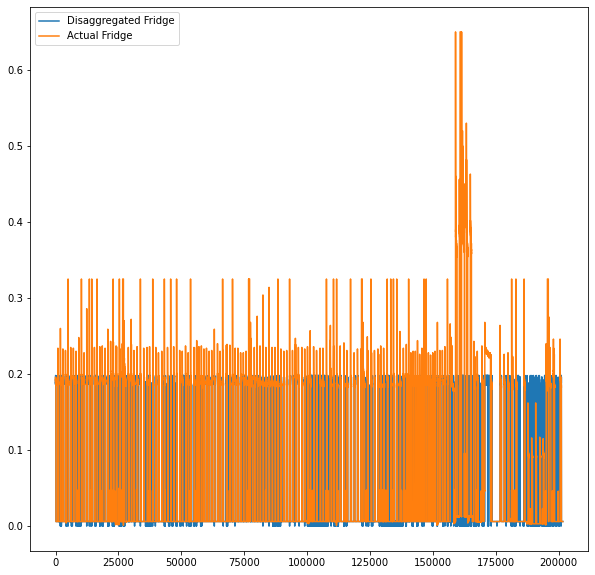

In [129]:
fridge_df.plot(figsize = (10, 10))

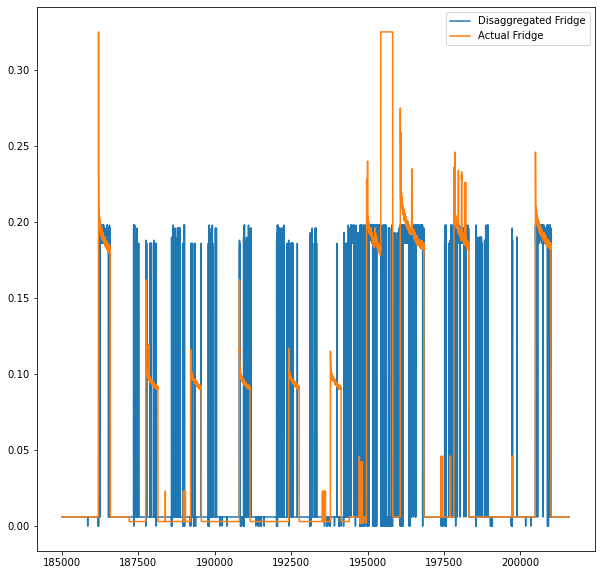

In [42]:
fridge_df[185000:].plot(figsize = (10, 10))

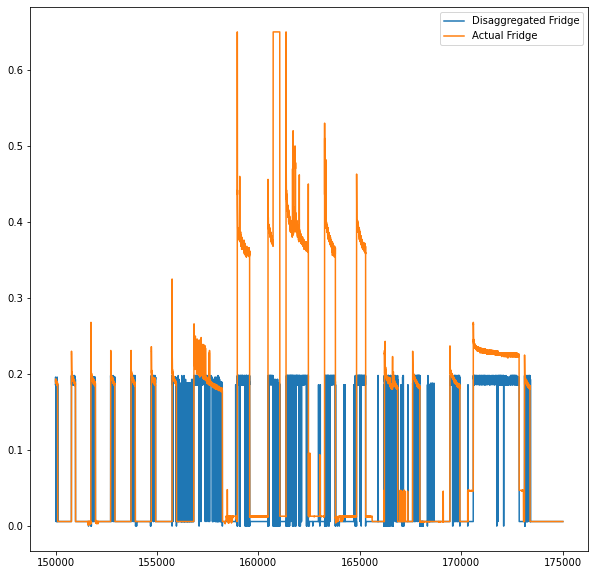

In [44]:
fridge_df[150000:175000].plot(figsize = (10, 10))

## Aircon Plots

In [45]:
aircon_df = pd.concat([disaggregated_df['AIRCON'], actual_df['AIRCON']], axis = 1)
aircon_df.columns = ['Disaggregated AIRCON', 'Actual AIRCON']

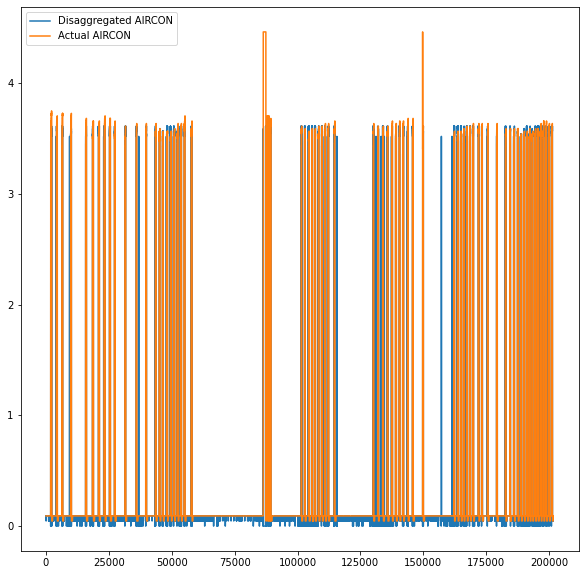

In [48]:
aircon_df.plot(figsize = (10, 10))

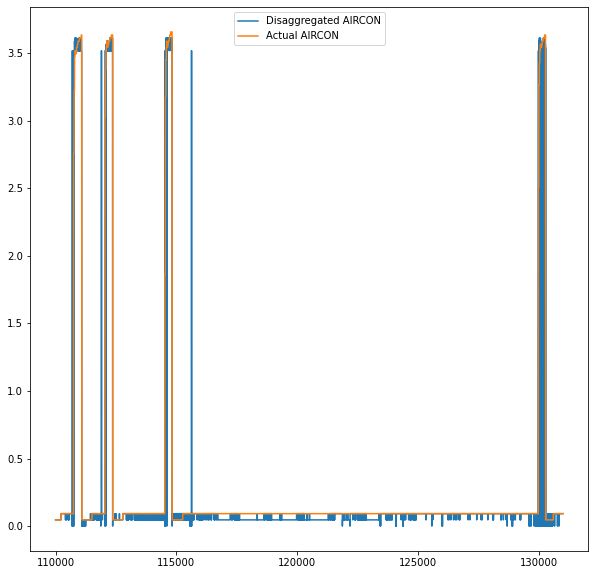

In [75]:
aircon_df[110000:131000].plot(figsize = (10, 10))

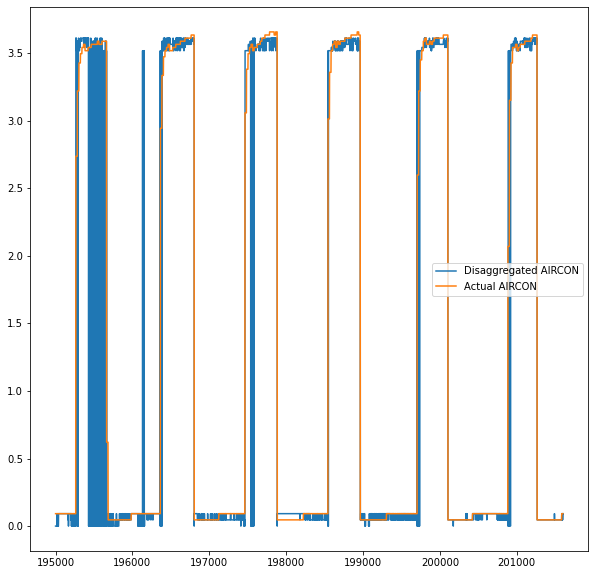

In [51]:
aircon_df[195000:].plot(figsize = (10, 10))

## Microwave Plots

In [53]:
microwave_df = pd.concat([disaggregated_df['MICROWAVE'], actual_df['MICROWAVE']], axis = 1)
microwave_df.columns = ['Disaggregated Microwave', 'Actual Microwave']

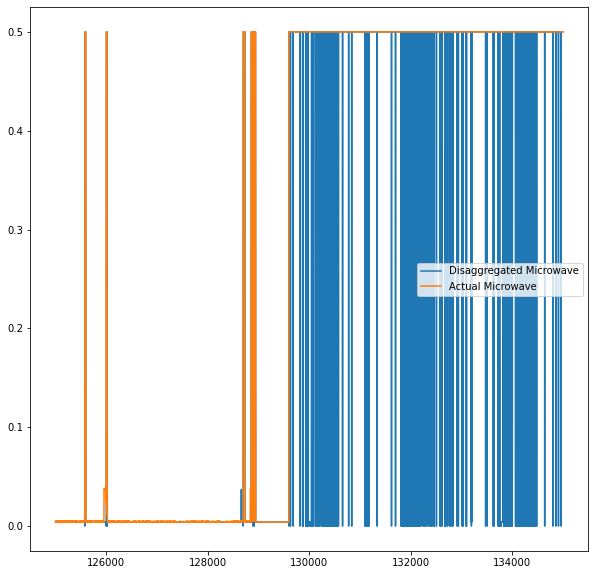

In [70]:
microwave_df[125000:135000].plot(figsize = (10, 10))

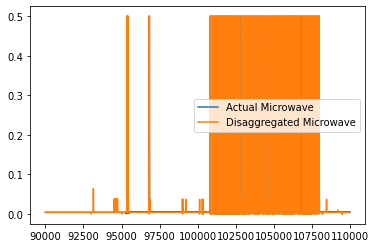

In [64]:
microwave_df[['Actual Microwave', 'Disaggregated Microwave']][90000:110000].plot()

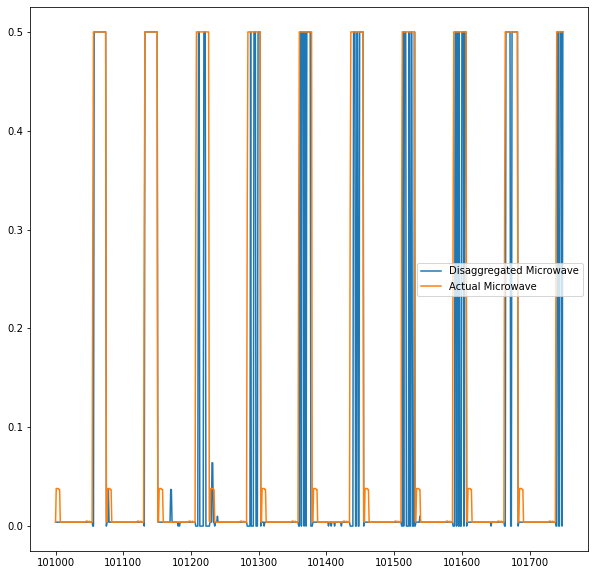

In [92]:
microwave_df[101000:101750].plot(figsize = (10, 10))

In [95]:
%run -i test_Algorithm.py FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON REDD_modified2_model_ALL REDD_modified2_val_kW 1000 W denoised all SparseViterbi


----------------------------------------------------------------------------------------------------------------
Test & Evaluate the Sparse Viterbi Algorithm with Saved SSHMMs  --  Copyright (C) 2013-2015, by Stephen Makonin.
----------------------------------------------------------------------------------------------------------------

Start Time =  2020-07-22 11:55:57.981425 (local time)


Parameters: ['FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON', 'REDD_modified2_model_ALL', 'REDD_modified2_val_kW', '1000', 'W', 'denoised', 'all', 'SparseViterbi']
Using disaggregation algorithm disagg_algo() from algo_SparseViterbi.py.

Loading saved model REDD_modified2_model_ALL from JSON storage (./models/REDD_modified2_model_ALL.json)...
	Model set for 1-fold cross-validation.
	Loading JSON data into SSHMM objects...
	Model labels are:  ['FRIDGE', 'SOCKETS', 'LIGHT', 'MICROWAVE', 'AIRCON']

Testing SparseViterbi algorithm load disagg...

Loading REDD Low Res dataset at ./datasets/REDD_modified2_val_

C:\Users\CGH\Documents\Github\sparseNILM\libAccuracy.py:153: RuntimeWarning: overflow encountered in long_scalars
  self.measure_diff_sq[item][fold] += diff ** 2


	Completed  1/ 1: [====================], Disagg rate:     0.000355 sec/sample 

Evaluation and accuracy testing complete:
	Test Time was 1.96  min (avg  1.96  min/fold).
	Optimization (Time) - Viterbi Part 1: 99.94 % saved,  2,934,868 calculations (average 14.6 calculations each time)
	Optimization (Time) - Viterbi Part 2: 100.0 % saved,  8,074,663 calculations (average 40.1 calculations each time)
	Unexpected events = 4826 , Multiple switch events = 47045 , Adapted events = 0 (errors = 0 )


Classification & Esitmation Accuracies (Test FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON):

	Accuracy     =  95.48% (45,583 incorrect tests)
	Precision    =  98.28%
	Recall       =  96.97%
	F-Score      =  97.62%

	M Precision  =  82.95%
	M Recall     =  81.85%
	M F-Score    =  82.40%

	FS Precision =  91.82%
	FS Recall    =  90.60%
	FS F-Score   =  91.21%

	NDE          =   7.09%
	MAPE         =   5.50%
	RMSE         = 209.64
	Esitmation   =  92.91% (24,752,331.0 W difference)

	|----------|----------

In [98]:
val_df

,TimeStamp,MAIN,FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON
0,1305259200,0.436,0.192,0.105,0.043,0.004,0.092
1,1305259203,0.433,0.194,0.100,0.043,0.004,0.092
2,1305259206,0.446,0.192,0.115,0.043,0.004,0.092
3,1305259209,0.442,0.192,0.110,0.044,0.004,0.092
4,1305259212,0.436,0.192,0.105,0.043,0.004,0.092
...,...,...,...,...,...,...,...
201595,1305863985,0.198,0.006,0.060,0.036,0.004,0.092
201596,1305863988,0.198,0.006,0.060,0.036,0.004,0.092
201597,1305863991,0.199,0.006,0.060,0.037,0.004,0.092
201598,1305863994,0.199,0.006,0.060,0.037,0.004,0.092


In [15]:
import pandas as pd
import pickle

with open('logs\REDD_modified2_val_kW_FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON_ue_tags.pkl', 'rb') as f:  # Python 3: open(..., 'rb')
    ue_tags = pickle.load(f)
f.close()

In [16]:
ue_df = pd.DataFrame(ue_tags, columns = ['Unexpected Event'])

In [105]:
ue_df

,Unexpected Event
0,False
1,False
2,False
3,False
4,False
...,...
201594,False
201595,False
201596,False
201597,False


In [17]:
new_val = pd.concat([val_df, ue_df], axis = 1)[:-1]

In [111]:
new_val

,TimeStamp,MAIN,FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON,Unexpected Event
0,1305259200,0.436,0.192,0.105,0.043,0.004,0.092,False
1,1305259203,0.433,0.194,0.100,0.043,0.004,0.092,False
2,1305259206,0.446,0.192,0.115,0.043,0.004,0.092,False
3,1305259209,0.442,0.192,0.110,0.044,0.004,0.092,False
4,1305259212,0.436,0.192,0.105,0.043,0.004,0.092,False
...,...,...,...,...,...,...,...,...
201594,1305863982,0.214,0.006,0.075,0.037,0.004,0.092,False
201595,1305863985,0.198,0.006,0.060,0.036,0.004,0.092,False
201596,1305863988,0.198,0.006,0.060,0.036,0.004,0.092,False
201597,1305863991,0.199,0.006,0.060,0.037,0.004,0.092,False


In [ ]:
x = np.linspace(0, 3 * np.pi, 500)
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
norm = plt.Normalize(dydx.min(), dydx.max())
lc = LineCollection(segments, cmap='viridis', norm=norm)
# Set the values used for colormapping
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[0].add_collection(lc)
fig.colorbar(line, ax=axs[0])

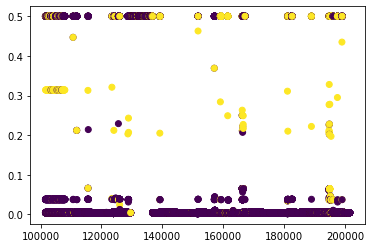

In [20]:
import matplotlib.pyplot as plt

plt.scatter(x = list(range(len(new_val)))[-100000:], y = new_val['MICROWAVE'][-100000:], c = new_val['Unexpected Event'][-100000:])

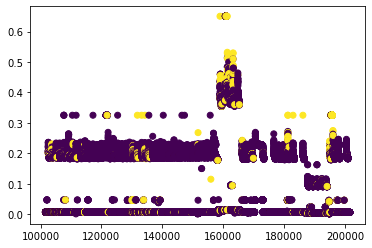

In [21]:
plt.scatter(x = list(range(len(new_val)))[-100000:], y = new_val['FRIDGE'][-100000:], c = new_val['Unexpected Event'][-100000:])

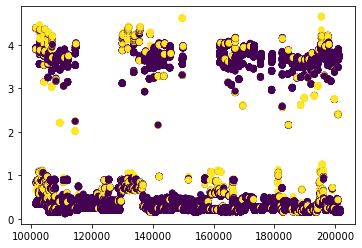

In [22]:
plt.scatter(x = list(range(len(new_val)))[-100000:], y = new_val['MAIN'][-100000:], c = new_val['Unexpected Event'][-100000:])

In [120]:
points = new_val['MAIN']
segments = np.concatenate([points[:-1], points[1:]])

In [122]:
segments

array([0.436, 0.433, 0.446, ..., 0.198, 0.199, 0.199])

In [114]:
import matplotlib.pyplot as plt

plt.plot(new_val[['MAIN']], c=new_val['Unexpected Event'])

ValueError: Invalid RGBA argument: 0         False
1         False
2         False
3         False
4         False
          ...  
201594    False
201595    False
201596    False
201597    False
201598    False
Name: Unexpected Event, Length: 201599, dtype: object

<Figure size 432x288 with 1 Axes>

In [ ]:
import numpy as np
import pylab as pl
from matplotlib import collections  as mc

lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)

In [21]:
%run -i test_Algorithm.py FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON REDD_modified2_model_ALL REDD_modified2_val_kW 1000 W denoised all SparseViterbi


----------------------------------------------------------------------------------------------------------------
Test & Evaluate the Sparse Viterbi Algorithm with Saved SSHMMs  --  Copyright (C) 2013-2015, by Stephen Makonin.
----------------------------------------------------------------------------------------------------------------

Start Time =  2020-07-22 13:29:55.598980 (local time)


Parameters: ['FRIDGE,SOCKETS,LIGHT,MICROWAVE,AIRCON', 'REDD_modified2_model_ALL', 'REDD_modified2_val_kW', '1000', 'W', 'denoised', 'all', 'SparseViterbi']
Using disaggregation algorithm disagg_algo() from algo_SparseViterbi.py.

Loading saved model REDD_modified2_model_ALL from JSON storage (./models/REDD_modified2_model_ALL.json)...


KeyboardInterrupt: 